# Import Statements

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import cv2
import scipy.misc
from tqdm import tqdm


In [20]:
IMAGE_DIR = 'data/lyft_data/CameraRGB/'
LABLE_DIR = 'data/lyft_data/CameraSeg/'
OUTPUT_DIR = 'data/lyft_data/CameraSegProcessed/'
CHOSEN_IMG = 'F61-55.png'
PROCESS_FLAG = False

In [21]:
image = cv2.cvtColor(cv2.imread(os.path.join(IMAGE_DIR,CHOSEN_IMG)), cv2.COLOR_BGR2RGB)
gt_image = cv2.cvtColor(cv2.imread(os.path.join(LABLE_DIR,CHOSEN_IMG)), cv2.COLOR_BGR2RGB)

## Label Encodings can be found in the Red Channel of the Ground Truth Image

Text(0.5,1,'Original Image')

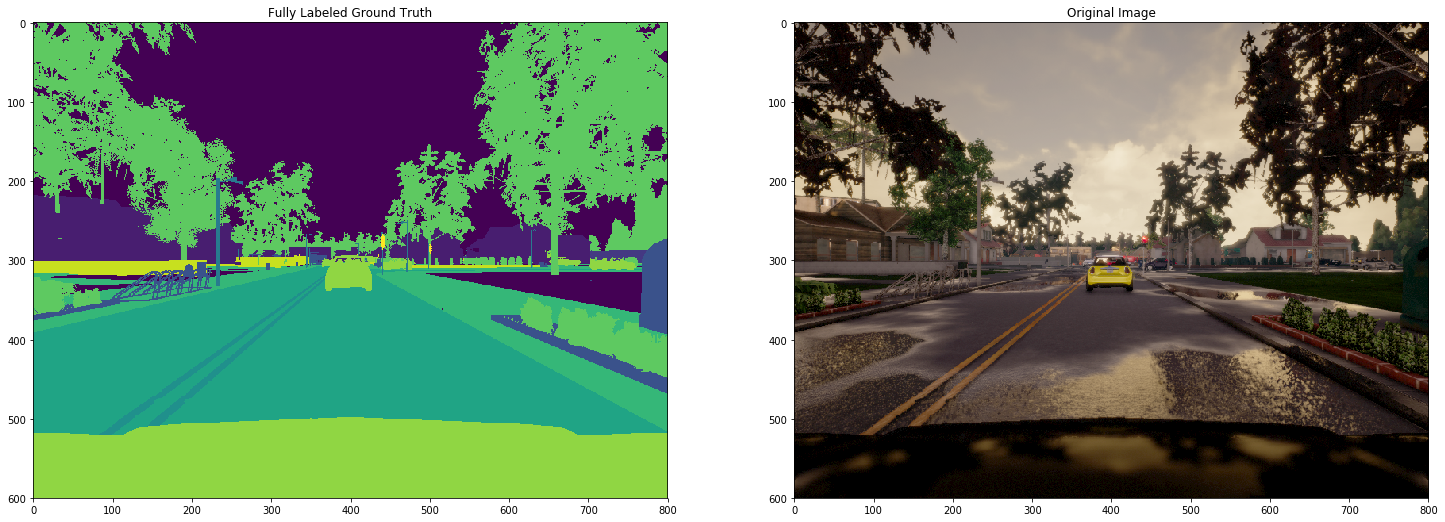

In [22]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(25,10))
ax1.imshow(gt_image[:,:,0])
ax1.set_title('Fully Labeled Ground Truth')
ax2.imshow(image)
ax2.set_title('Original Image')

In [36]:
def preprocess_labels(label_image):
    labels_new = np.copy(label_image)
    
    # Identify lane marking pixels (label is 6)
    lane_marking_pixels = (label_image[:,:,0] == 6).nonzero()
    # Set lane marking pixels to road (label is 7)
    labels_new[lane_marking_pixels] = 7
    labels_new[:,:,1].fill(0)
    labels_new[:,:,2].fill(0)

    # Identify all vehicle pixels
    vehicle_pixels = (label_image[:,:,0] == 10).nonzero()
    # Isolate vehicle pixels associated with the hood (y-position > 496)
    hood_indices = (vehicle_pixels[0] >= 496).nonzero()[0]
    hood_pixels = (vehicle_pixels[0][hood_indices],
                   vehicle_pixels[1][hood_indices])
    # Set hood pixel labels to None (label is 0)
    labels_new[hood_pixels] = 0
    

    # Identify all pixels that are not road or vehicle
    not_road_vehicle_pixels = np.logical_and(labels_new[:,:,0] != 7, labels_new[:,:,0] != 10)
    labels_new[not_road_vehicle_pixels] = 0
    
    return labels_new.astype(np.uint8)

In [37]:
preproccessed_gt_img = preprocess_labels(gt_image)

Pixel values of image are already normalized (Y, X)
Example pixel value of car (Not Normalized) at (300, 100):  0
Example pixel value of road (Not Normalized) at (400, 400):  7


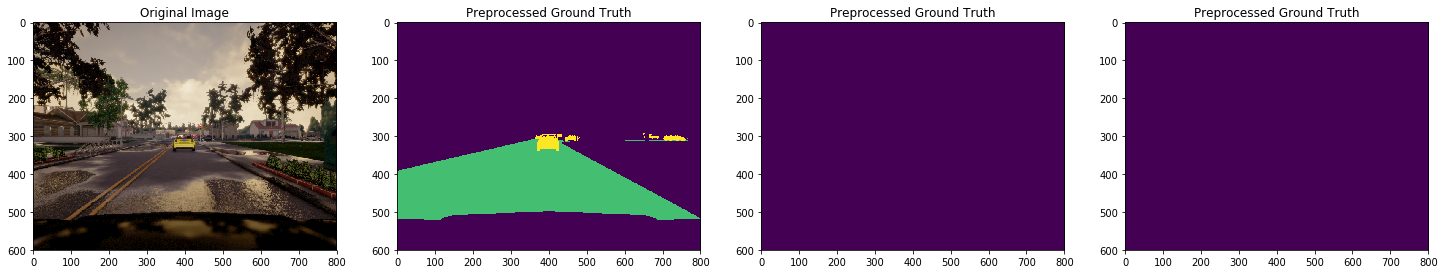

In [38]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(25,10))

ax1.imshow(image)
ax1.set_title('Original Image')

ax2.imshow(preproccessed_gt_img[:,:,0])
ax2.set_title('Preprocessed Ground Truth')

ax3.imshow(preproccessed_gt_img[:,:,1])
ax3.set_title('Preprocessed Ground Truth')

ax4.imshow(preproccessed_gt_img[:,:,2])
ax4.set_title('Preprocessed Ground Truth')

print('Pixel values of image are already normalized (Y, X)')
print('Example pixel value of car (Not Normalized) at (300, 100): ', preproccessed_gt_img[300,100,0])
print('Example pixel value of road (Not Normalized) at (400, 400): ', preproccessed_gt_img[400,400,0])

In [8]:
def process_images(directory):
    print('Starting')
    for image_file in tqdm(os.listdir(directory)):
        lbl = scipy.misc.imread(os.path.join(directory, image_file))
        new_lbl = preprocess_labels(lbl)
        scipy.misc.imsave(os.path.join(OUTPUT_DIR, image_file), new_lbl)
    print('Finished')

In [9]:
process_images(LABLE_DIR)

Starting


  0%|                                                                                                                                                                                                              | 0/2000 [00:00<?, ?it/s]C:\Dev\Miniconda3\envs\tf18\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
C:\Dev\Miniconda3\envs\tf18\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:57<00:00, 16.97it/s]


Finished


In [28]:
img = plt.imread(os.path.join(IMAGE_DIR,CHOSEN_IMG))
gtp_img = plt.imread(os.path.join(OUTPUT_DIR,CHOSEN_IMG))[:,:,0]

(array([  0,   0,   0, ..., 599, 599, 599], dtype=int64), array([  0,   1,   2, ..., 797, 798, 799], dtype=int64))
0.0


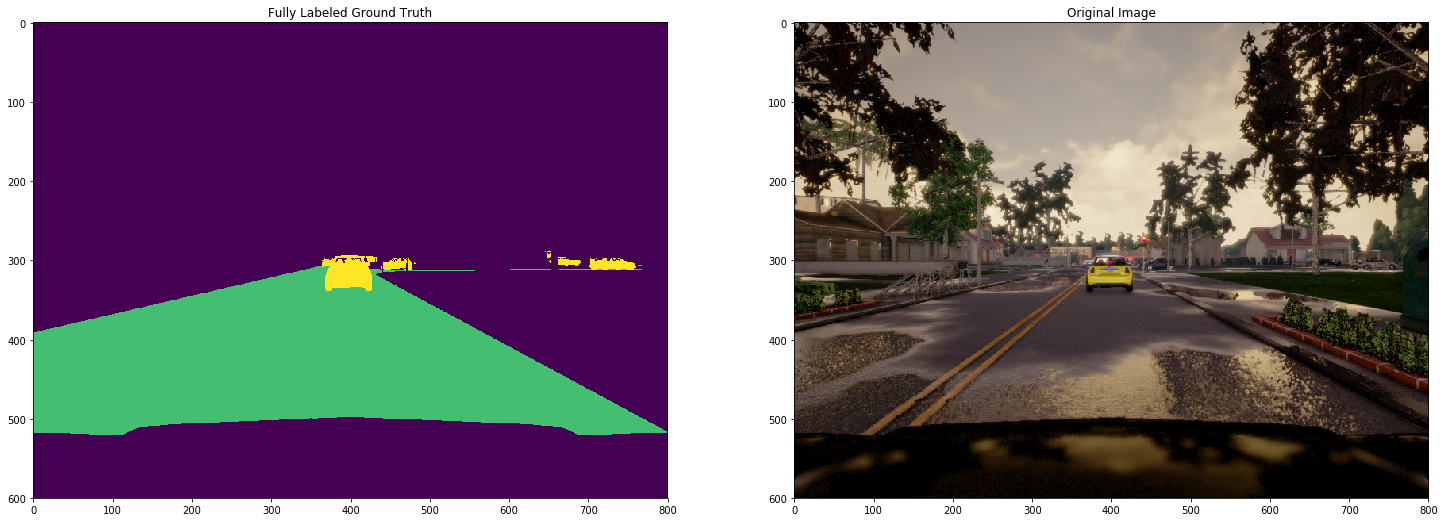

In [35]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(25,10))
ax1.imshow(gtp_img)
ax1.set_title('Fully Labeled Ground Truth')
ax2.imshow(img)
ax2.set_title('Original Image')
test = np.logical_or(np.logical_or(gtp_img!=7,gtp_img!=10), gtp_img!=0)
print(np.where(test))
print(gtp_img[599,799])